In [54]:
%%capture
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
import category_encoders as ce
from sklearn.impute import SimpleImputer
import pickle
from joblib import dump
from joblib import load


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

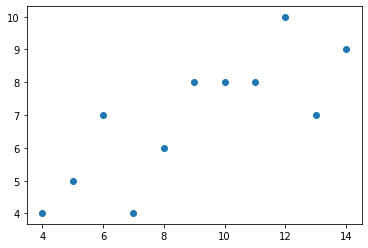

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

matplotlib_figure = plt.figure()
x = [10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5]
y = [ 8,  6,  7,  8,  8,  9,  7,  4, 10,  4,  5]
plt.scatter(x, y)

In [5]:
from plotly.tools import mpl_to_plotly
plotly_figure = mpl_to_plotly(matplotlib_figure)
plotly_figure.show()

/Users/user/anaconda3/lib/python3.7/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



# Importing PKL For Plotly Dash Use

In [6]:
df = pd.read_pickle("/Users/user/Documents/GitHub/MIR/Spotify/Dash_Project/master_list.pkl")

In [7]:
df.columns

Index(['release_year', 'us_popularity_estimate', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'mechanism', 'mode', 'organism',
       'speechiness', 'tempo', 'time_signature', 'valence', 'skip_2'],
      dtype='object')

In [8]:
rejected = ["flatness","valence","liveness","mode","key","time_signature","skip_2"]

In [9]:
X = df.drop(rejected,axis=1)
y = df["skip_2"]

In [10]:
X.columns

Index(['release_year', 'us_popularity_estimate', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'instrumentalness',
       'mechanism', 'organism', 'speechiness', 'tempo'],
      dtype='object')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
y_train.value_counts(normalize=True)

True     0.50727
False    0.49273
Name: skip_2, dtype: float64

# Two Models

In [11]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.5786249717957932


In [12]:
pipeline2 = make_pipeline(
    ce.TargetEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)
print("Recall:",recall_score(y_test, y_pred))

Recall: 0.5786249717957932


In [15]:
print('Validation Accuracy Random Forrest', accuracy_score(y_test, y_pred))
print('Validation Accuracy XG Boost', accuracy_score(y_test, y_pred2))

Validation Accuracy Random Forrest 0.5412082323223761
Validation Accuracy XG Boost 0.537207350772204


In [16]:
X_train["time_signature"].unique()

array([4, 1, 3, 5, 0])

In [17]:
X_train.describe()

release_year  us_popularity_estimate  beat_strength     bounciness  \
count  943792.000000           943792.000000  943792.000000  943792.000000   
mean     2012.941036               99.715750       0.535696       0.565429   
std        10.051351                0.950123       0.162495       0.181756   
min      1950.000000               90.008624       0.000000       0.000000   
25%      2014.000000               99.899547       0.417244       0.434950   
50%      2017.000000               99.986025       0.535500       0.576769   
75%      2018.000000               99.998417       0.650891       0.706252   
max      2018.000000               99.999997       0.990419       0.972590   

        danceability  dyn_range_mean         energy       flatness  \
count  943792.000000   943792.000000  943792.000000  943792.000000   
mean        0.656410        8.889719       0.633954       1.006108   
std         0.160685        2.503540       0.181381       0.039477   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.546669        7.004330       0.524198       0.986802   
50%         0.670922        8.715856       0.636002       1.012081   
75%         0.774036       10.517122       0.767345       1.032296   
max         0.988423       32.342781       0.999902       1.110550   

       instrumentalness            key       liveness      mechanism  \
count      9.437920e+05  943792.000000  943792.000000  943792.000000   
mean       3.424654e-02       5.119842       0.192510       0.589390   
std        1.476633e-01       3.647172       0.152597       0.214338   
min        0.000000e+00       0.000000       0.000000       0.000000   
25%        6.611606e-09       1.000000       0.100037       0.429668   
50%        8.812382e-07       5.000000       0.128021       0.627832   
75%        1.200129e-04       8.000000       0.240177       0.761719   
max        9.999948e-01      11.000000       1.000000       1.000000   

            organism    speechiness          tempo  time_signature  \
count  943792.000000  943792.000000  943792.000000   943792.000000   
mean        0.352465       0.134965     122.127599        3.942186   
std         0.192724       0.128958      29.299750        0.361334   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.200711       0.043240      96.975998        4.000000   
50%         0.313701       0.079221     122.250999        4.000000   
75%         0.478745       0.196543     144.042007        4.000000   
max         0.964116       0.965482     242.317993        5.000000   

             valence  
count  943792.000000  
mean        0.460387  
std         0.228972  
min         0.000000  
25%         0.276425  
50%         0.442084  
75%         0.624226  
max         0.999990

# Prepare for Dash

In [20]:
# encoder = ce.TargetEncoder()
# X_train_encoded = encoder.fit_transform(X_train,y_train)
# X_test_encoded = encoder.transform(X_test)

In [13]:
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1,max_depth=35,min_samples_split=10000)
)

# Fit on train, score on test
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Random Forest Recall:",recall_score(y_test, y_pred))
print('Validation Accuracy Random Forrest', accuracy_score(y_test, y_pred))

Random Forest Recall: 0.694834660672054
Validation Accuracy Random Forrest 0.5403648261481343


In [24]:
pipeline2 = make_pipeline( 
    ce.TargetEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline2.fit(X_train, y_train)
y_pred2 = pipeline2.predict(X_test)
print("XGB Recall:",recall_score(y_test, y_pred2))
print('Validation Accuracy XG Boost', accuracy_score(y_test, y_pred2))

XGB Recall: 0.7043948421817938
Validation Accuracy XG Boost 0.5364317561496601


In [14]:
#pipeline dump for first model

dump(pipeline, 'randomforest.joblib', compress=True)

['randomforest.joblib']

In [26]:
#pipeline dump for first model

dump(pipeline2, 'xgboost.joblib', compress=True)

['xgboost.joblib']

In [46]:
# #Exort two models for use in the plotly dash app

# for model in enumerate([RandomForest,XG_Boost]):
# #     print(f'{model[0]}')
#     file = open(f'/users/User/Documents/GitHub/MIR/Spotify/spotify-playlist-skipping-predictions/assets/{model[0]}.pkl','wb')
#     pickle.dump(model[1],file)
#     file.close()

# Dataset Exploration

In [15]:
X_test.describe()

release_year  us_popularity_estimate  beat_strength     bounciness  \
count  235948.000000           235948.000000  235948.000000  235948.000000   
mean     2012.970154               99.716408       0.535387       0.565036   
std         9.982034                0.949077       0.162504       0.182021   
min      1950.000000               90.037740       0.000000       0.000000   
25%      2014.000000               99.899618       0.417244       0.433820   
50%      2017.000000               99.986104       0.535414       0.576769   
75%      2018.000000               99.998430       0.650891       0.706535   
max      2018.000000               99.999997       0.956032       0.960323   

        danceability  dyn_range_mean         energy  instrumentalness  \
count  235948.000000   235948.000000  235948.000000      2.359480e+05   
mean        0.656332        8.885745       0.633654      3.435981e-02   
std         0.160747        2.509477       0.181809      1.480248e-01   
min         0.000000        0.000000       0.000000      0.000000e+00   
25%         0.546858        6.995955       0.523033      6.698478e-09   
50%         0.671129        8.712061       0.636002      8.179231e-07   
75%         0.773455       10.538352       0.767473      1.149505e-04   
max         0.984664       38.160179       0.999945      9.999756e-01   

           mechanism       organism    speechiness          tempo  
count  235948.000000  235948.000000  235948.000000  235948.000000  
mean        0.588873       0.352714       0.134774     122.048602  
std         0.213933       0.192380       0.128742      29.285580  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.429668       0.201810       0.043198      96.975998  
50%         0.627329       0.313796       0.079157     122.055000  
75%         0.761146       0.477780       0.196425     144.009251  
max         1.000000       0.969082       0.964600     244.035004

In [16]:
min_max = {}
for column in X_test.describe():
    min_max.update({column: [X_test.describe()[column].iloc[[3]][0],X_test.describe()[column].iloc[[7]][0]]})

In [17]:
print(min_max)

{'release_year': [1950.0, 2018.0], 'us_popularity_estimate': [90.03773997498692, 99.99999678325527], 'beat_strength': [0.0, 0.9560315608978271], 'bounciness': [0.0, 0.9603226780891418], 'danceability': [0.0, 0.9846640825271606], 'dyn_range_mean': [0.0, 38.1601791381836], 'energy': [0.0, 0.9999449253082277], 'instrumentalness': [0.0, 0.999975562095642], 'mechanism': [0.0, 1.0], 'organism': [0.0, 0.9690818190574646], 'speechiness': [0.0, 0.9645995497703552], 'tempo': [0.0, 244.03500366210938]}


In [135]:
X_test["key"].value_counts()

1     37138
0     24633
7     22755
2     22453
9     21364
11    18953
5     18008
6     17847
10    16429
8     16374
4     15369
3      4625
Name: key, dtype: int64

In [153]:
pipeline2.predict(X_test_encoded.iloc[[3]])

array([ True])

In [184]:
# new_obs = X_test_encoded.iloc[[3]][X_test.columns]

# pipeline2.predict(new_obs)

array([ True])

In [192]:
new_obs = pd.DataFrame(new_obs,columns=X_test.columns)

pipeline2.predict(new_obs)

array([ True])

In [28]:
import joblib
import sklearn
import category_encoders as ce
print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')

joblib==0.13.2
scikit-learn==0.21.2
category_encoders==2.1.0


# Data Exploration and Blog Post Content

In [29]:
X_test.describe()

release_year  us_popularity_estimate  beat_strength     bounciness  \
count  235948.000000           235948.000000  235948.000000  235948.000000   
mean     2012.970154               99.716408       0.535387       0.565036   
std         9.982034                0.949077       0.162504       0.182021   
min      1950.000000               90.037740       0.000000       0.000000   
25%      2014.000000               99.899618       0.417244       0.433820   
50%      2017.000000               99.986104       0.535414       0.576769   
75%      2018.000000               99.998430       0.650891       0.706535   
max      2018.000000               99.999997       0.956032       0.960323   

        danceability  dyn_range_mean         energy  instrumentalness  \
count  235948.000000   235948.000000  235948.000000      2.359480e+05   
mean        0.656332        8.885745       0.633654      3.435981e-02   
std         0.160747        2.509477       0.181809      1.480248e-01   
min         0.000000        0.000000       0.000000      0.000000e+00   
25%         0.546858        6.995955       0.523033      6.698478e-09   
50%         0.671129        8.712061       0.636002      8.179231e-07   
75%         0.773455       10.538352       0.767473      1.149505e-04   
max         0.984664       38.160179       0.999945      9.999756e-01   

           mechanism       organism    speechiness          tempo  
count  235948.000000  235948.000000  235948.000000  235948.000000  
mean        0.588873       0.352714       0.134774     122.048602  
std         0.213933       0.192380       0.128742      29.285580  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.429668       0.201810       0.043198      96.975998  
50%         0.627329       0.313796       0.079157     122.055000  
75%         0.761146       0.477780       0.196425     144.009251  
max         1.000000       0.969082       0.964600     244.035004

In [30]:
X_test.columns

Index(['release_year', 'us_popularity_estimate', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'instrumentalness',
       'mechanism', 'organism', 'speechiness', 'tempo'],
      dtype='object')

In [99]:
import pandas_profiling 

profile_report = X_test.profile_report(check_correlation_pearson= False, correlations={'pearson': False,
                                                                  'spearman': False,
                                                                  'kendall': False,
                                                                  'phi_k': False,
                                                                  'cramers': False,
                                                                  'recoded':False},
                  plot ={'histogram':{'bayesian_blocks_bins': False}})

In [100]:
profile_report

# Blog Post and Visualization Ideas

In [ ]:
### Get feature importances - possibly useful at another time


# rf = pipeline2.named_steps['xgbclassifier']
# importances = pd.Series(rf.feature_importances_, X_test.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

In [203]:
encoder = ce.TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train,y_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((755033, 19), (188759, 19), (755033, 19), (188759, 19))

In [61]:
###possibly useful in the future###

# eval_set = [(X_train_encoded, y_train), 
#             (X_val_encoded, y_val)]

# model = XGBClassifier(
#     n_estimators=1000, # <= 1000 trees, depends on early stopping
#     max_depth=7,       # try deeper trees because of high cardinality categoricals
#     learning_rate=0.1, # try higher learning rate
#     n_jobs=-1
# )

# model.fit(X_train_encoded, y_train, eval_set=eval_set, 
#           eval_metric='error', early_stopping_rounds=50)

In [62]:
###possibly useful in the future###

# results = model.evals_result()
# train_error = results['validation_0']['error']
# val_error = results['validation_1']['error']
# epoch = range(1, len(train_error)+1)
# plt.plot(epoch, train_error, label='Train')
# plt.plot(epoch, val_error, label='Validation')
# plt.ylabel('AUC')
# plt.xlabel('Model Complexity (n_estimators)')
# plt.ylim((0.45, 0.47)) # Zoom in
# plt.xlim((-1, 20)) # Zoom in
# plt.legend();

In [63]:
###possibly useful in the future###



# #Multicollinear Feature Visualization - Very Nice little visualization for Project 

# from collections import defaultdict

# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import spearmanr
# from scipy.cluster import hierarchy


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
# corr = spearmanr(X_train).correlation
# corr_linkage = hierarchy.ward(corr)
# dendro = hierarchy.dendrogram(corr_linkage, labels=master_list2.columns, ax=ax1,
#                               leaf_rotation=90)
# dendro_idx = np.arange(0, len(dendro['ivl']))

# ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
# ax2.set_xticks(dendro_idx)
# ax2.set_yticks(dendro_idx)
# ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
# ax2.set_yticklabels(dendro['ivl'])
# fig.tight_layout()
# plt.show()

In [64]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.TargetEncoder(), 
#     XGBClassifier(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train)
# y_pred = gb.predict(X_val)
# print('Gradient Boosting recall', recall_score(y_val, y_pred))

In [65]:
# # Get feature importances
# rf = pipeline.named_steps['xgbclassifier']
# importances = pd.Series(rf.feature_importances_, X_val.columns)

# # Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

In [66]:
# Later, when you save matplotlib images to include in blog posts or web apps,
# increase the dots per inch (double it), so the text isn't so fuzzy
# import matplotlib.pyplot as plt
# plt.rcParams['figure.dpi'] = 72

# #this reveals a directly positively linear relationship between length of session and probability that track was more than partially played 

# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'us_popularity_estimate'

# isolated = pdp_isolate(
#     model=gb, 
#     dataset=X_val, 
#     model_features=X_val.columns, 
#     feature=feature
# )

# pdp_plot(isolated, feature_name=feature);
# # plt.xlim((99.5, 100)) # Zoom in
# # plt.ylim((-.075, .1)) # Zoom in

master_list2.groupby(["us_popularity_estimate"])["skip_2"].mean()

X_train["us_popularity_estimate"].value_counts()

example = X_val.iloc[[0]]
example2 = X_val.iloc[[2]]

pd.concat([example, example2])

# Creating Shapley Plot

In [19]:
processor = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

eval_set = [(X_train_processed, y_train), 
            (X_test_processed, y_test)]

model = XGBClassifier(n_estimators=1000, n_jobs=-1)
model.fit(X_train_processed, y_train, eval_set=eval_set, eval_metric='auc', 
          early_stopping_rounds=10)

[0]	validation_0-auc:0.535192	validation_1-auc:0.534277
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.535777	validation_1-auc:0.534856
[2]	validation_0-auc:0.535692	validation_1-auc:0.534612
[3]	validation_0-auc:0.537665	validation_1-auc:0.536027
[4]	validation_0-auc:0.538198	validation_1-auc:0.536506
[5]	validation_0-auc:0.541132	validation_1-auc:0.538921
[6]	validation_0-auc:0.541811	validation_1-auc:0.539852
[7]	validation_0-auc:0.542694	validation_1-auc:0.540688
[8]	validation_0-auc:0.542804	validation_1-auc:0.54079
[9]	validation_0-auc:0.54279	validation_1-auc:0.540826
[10]	validation_0-auc:0.543296	validation_1-auc:0.541302
[11]	validation_0-auc:0.543458	validation_1-auc:0.541516
[12]	validation_0-auc:0.54384	validation_1-auc:0.541769
[13]	validation_0-auc:0.544382	validation_1-auc:0.542205
[14]	validation_0-auc:0.545538	validation_1-auc:0.543437
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [24]:
y_pred = pipeline.predict(X_test)

# ROC / AUC Stats

# Put more work into the ROC AUC!!!!

from sklearn.metrics import roc_auc_score
X_test_processed = processor.transform(X_test[features])
class_index = 1
y_pred_proba = model.predict_proba(X_test_processed)[:, class_index]
print(f'Test ROC AUC for class {class_index}:')
print(roc_auc_score(y_test, y_pred_proba)) # Ranges from 0-1, higher is better

In [26]:
#gb utilized target encoded / XGBOOST 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

y_pred_proba = cross_val_predict(pipeline, X_test, y_test, cv=5, n_jobs=-1, 
                                 method='predict_proba')[:, 1]

In [27]:
y_pred_proba[:2]

array([0.52468557, 0.516789  ])

Area under the Receiver Operating Characteristic curve: 0.5473962301744928


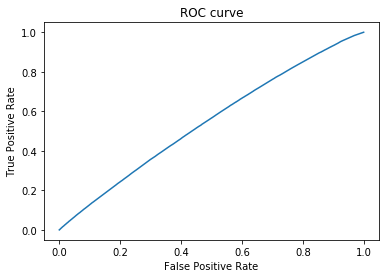

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('Area under the Receiver Operating Characteristic curve:', 
      roc_auc_score(y_test, y_pred_proba))

In [29]:
#ask about this for the sprint challenge

roc_table = pd.DataFrame({'False Positive Rate': fpr, 
              'True Positive Rate': tpr, 
              'Threshold': thresholds})

combined_table = pd.merge(roc_table,y_test,left_index=True, right_index=True)

combined_table.head(20)

In [355]:
y_pred_df = pd.DataFrame(y_pred, columns = ["skip_2_pred"])

In [356]:
combined_table2 = pd.merge(combined_table,y_pred_df,left_index=True, right_index=True)

combined_table2.head()

In [ ]:
combined_table2.head(20)

for i in zip(combined_table2['skip_2'],combined_table2['skip_2_pred']):
    t_pos = []
    f_pos = []
    print(i[0] == i[1])

# Shapley Plots

In [31]:
X_test.iloc[[3094]]

release_year  us_popularity_estimate  beat_strength  bounciness  \
708413          2010               99.961753       0.262074    0.261804   

        danceability  dyn_range_mean    energy  instrumentalness  mechanism  \
708413      0.539705        5.520186  0.634578           0.78785   0.565217   

        organism  speechiness       tempo  
708413   0.30744     0.051902  119.995003

In [32]:
row = X_test.iloc[[3094]]

In [33]:
X_test2 = X_test.copy()

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc = ce.OrdinalEncoder()
enc.fit(X_test2)
X_transformed = enc.transform(X_test2)


In [36]:
X_transformed.head()

release_year  us_popularity_estimate  beat_strength  bounciness  \
482426           2017               99.987871       0.618158    0.657375   
1102696          2011               99.989462       0.510743    0.481535   
8872             2018               99.978189       0.549699    0.610148   
1174062          2011               99.964436       0.462095    0.455585   
371078           2018               99.998546       0.672353    0.724971   

         danceability  dyn_range_mean    energy  instrumentalness  mechanism  \
482426       0.752888        9.648240  0.759623          0.000031   0.540323   
1102696      0.670326        7.153525  0.876307          0.003015   0.853175   
8872         0.754105        9.297995  0.833328          0.000003   0.647260   
1174062      0.605245        7.140511  0.908883          0.002404   0.354523   
371078       0.775478       10.741310  0.481582          0.045565   0.787234   

         organism  speechiness       tempo  
482426   0.452833     0.085876   91.953003  
1102696  0.104209     0.053551  126.968002  
8872     0.261386     0.140268   97.980003  
1174062  0.460447     0.093476  117.386002  
371078   0.369121     0.035661  136.016006

In [47]:
columns = []
values = []
for column in X_transformed:
#     print(column,X_transformed[column].mean())
    columns.append(column)
    values.append(X_transformed[column].mean())
    
# print(columns,values)

values

mo = pd.DataFrame(data=[values],columns=columns)


# Pickle the Explainer

In [63]:
dump(mo, 'mo.joblib', compress=True)

['mo.joblib']

In [59]:
explainer = shap.TreeExplainer(model)

In [60]:
dump(explainer, 'explainer.joblib', compress=True)

['explainer.joblib']

In [61]:
explainer = load('explainer.joblib')

In [62]:
# STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
import shap

# row_processed = processor.transform(row)
shap_values = explainer.shap_values(mo)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row
)

In [70]:
def explain(mo):
    positive_class = 'Fully Paid'
    positive_class_index = 1
    
    
    # Get & process the data for the row
    row = mo
    row_processed = processor.transform(row)
    
    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba
    
    # Show predictiion & probability
    print(f'The model predicts that this track was only played briefly is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)
    
    # Get top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    # Show top 3 reasons for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')
    
    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row
    )

    
explain(mo)

The model predicts that this track was only played briefly is True, with 47% probability.


Top 3 reasons for prediction:
1. instrumentalness is 0.034359810782435496.
2. dyn_range_mean is 8.885745446751033.
3. tempo is 122.0486022754982.


Top counter-argument against prediction:
- release_year is 2012.970154440809.


In [64]:
# # STUDY/PRACTICE THIS CELL FOR THE SPRINT CHALLENGE
# import shap

# explainer = shap.TreeExplainer(model)
# row_processed = processor.transform(row)
# shap_values = explainer.shap_values(row_processed)

# shap.initjs()
# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values, 
#     features=row
# )

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
shaps.sort_values().plot.barh(color='grey', figsize=(15,20));

In [277]:
pros = shaps.sort_values(ascending=False)[:3].index
cons = shaps.sort_values(ascending=True)[:3].index

print('Top 3 reasons for prediction:')
for i, pro in enumerate(pros, start=1):
    feature_name, feature_value = pro
    print(f'{i}. {feature_name} is {feature_value}.')

print('\n')
print('Cons:')
for i, con in enumerate(cons, start=1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} is {feature_value}.')

In [52]:
def explain(row_number):
    positive_class = 'Fully Paid'
    positive_class_index = 1
    
    
    # Get & process the data for the row
    row = X_test.iloc[[row_number]]
    row_processed = processor.transform(row)
    
    # Make predictions (includes predicted probability)
    pred = model.predict(row_processed)[0]
    pred_proba = model.predict_proba(row_processed)[0, positive_class_index]
    pred_proba *= 100
    if pred != positive_class:
        pred_proba = 100 - pred_proba
    
    # Show predictiion & probability
    print(f'The model predicts that this track was only played briefly is {pred}, with {pred_proba:.0f}% probability.')
    
    # Get shapley additive explanations
    shap_values = explainer.shap_values(row_processed)
    
    # Get top 3 "pros & cons"
    feature_names = row.columns
    feature_values = row.values[0]
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index
    
    # Show top 3 reasons for prediction
    print('\n')
    print('Top 3 reasons for prediction:')
    evidence = pros if pred == positive_class else cons
    for i, info in enumerate(evidence, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} is {feature_value}.')
    
    # Show top 1 counter-argument against prediction
    print('\n')
    print('Top counter-argument against prediction:')
    evidence = cons if pred == positive_class else pros
    feature_name, feature_value = evidence[0]
    print(f'- {feature_name} is {feature_value}.')
    
    # Show Shapley Values Force Plot
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row
    )

    
explain(3099)

The model predicts that this track was only played briefly is False, with 54% probability.


Top 3 reasons for prediction:
1. release_year is 2018.0.
2. tempo is 173.9810028076172.
3. mechanism is 0.7509652376174928.


Top counter-argument against prediction:
- us_popularity_estimate is 99.9988210630579.


X_train.describe()

# %matplotlib inline
# import seaborn as sns
# sns.distplot(master_list2['loudness']);